In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ifc_manager.core import IFCManager

In [2]:
converter = IFCManager()
converter.load_ifc('sample_models/CASA TIPO 11111.ifc')
structural_elements = converter.extract_structural_elements()
print(f"Extracted elements: {len(structural_elements)}")
print("Element types:", {elem['type'] for elem in structural_elements.values()})
converter.visualize_model()

Extracted elements: 89
Element types: {'IfcBeam', 'IfcSlab', 'IfcColumn', 'IfcFooting'}


In [3]:
# Extract structural elements (this populates converter.structural_elements)
converter.extract_structural_elements()

# Now you can access the extracted data
structural_elements_data = converter.structural_elements

for element_id, data in structural_elements_data.items():
    print(f"--- Element ID: {element_id} ---")
    print(f"  Name: {data.get('name', 'N/A')}")
    print(f"  Type: {data.get('type', 'N/A')}")
    
    # Access and print material information
    if data.get('material'):
        print("  Materials:")
        for mat_name, mat_data in data['material'].items():
            print(f"    - {mat_name} (Type: {mat_data.get('type', 'N/A')})")
            if mat_data.get('thickness') is not None:
                print(f"      Thickness: {mat_data['thickness']}")
            if mat_data.get('profile'):
                print(f"      Profile: {mat_data['profile']}")
            if mat_data.get('properties'):
                print(f"      Material Properties: {mat_data['properties']}")

    # Access and print profile information for linear elements
    if data.get('profile'):
        print(f"  Profile Information: {data['profile']}")
    
    # Access and print general properties (Psets)
    if data.get('properties'):
        print("  Other Properties:")
        for prop_name, prop_value in data['properties'].items():
            print(f"    - {prop_name}: {prop_value}")
        
        print('\n')

--- Element ID: 1YMpECnoXAAgd3TsblgkRb ---
  Name: M_Concrete-Rectangular Beam:250 x 500mm:416913
  Type: IfcBeam
  Materials:
    - Concrete, Cast-in-Place gray (Type: material)
  Other Properties:
    - Pset_BeamCommon.IsExternal: False
    - Pset_BeamCommon.LoadBearing: True
    - Pset_BeamCommon.id: 313
    - Pset_BeamCommon.Slope: 0.0
    - Pset_BeamCommon.Reference: 250 x 500mm
    - Pset_BeamCommon.Span: 5570.000000000003
    - Pset_BeamCommon.Roll: 0.0
    - Pset_EnvironmentalImpactIndicators.Reference: 250 x 500mm
    - Pset_EnvironmentalImpactIndicators.id: 314
    - Pset_ReinforcementBarPitchOfBeam.Reference: 250 x 500mm
    - Pset_ReinforcementBarPitchOfBeam.id: 316
    - Qto_BeamBaseQuantities.Length: 5570.000000000003
    - Qto_BeamBaseQuantities.CrossSectionArea: 0.07500000000012796
    - Qto_BeamBaseQuantities.OuterSurfaceArea: 5.720000000005508
    - Qto_BeamBaseQuantities.GrossSurfaceArea: 5.870000000005764
    - Qto_BeamBaseQuantities.NetSurfaceArea: 5.87000000000568

In [4]:
# Extract structural elements (this populates converter.structural_elements)
converter.extract_structural_elements()

# Now you can access the extracted data
structural_elements_data = converter.structural_elements

# Crear una lista para almacenar los datos
datos = []

for element_id, data in structural_elements_data.items():
    # Crear un diccionario para almacenar los datos de cada elemento
    elemento = {
        'Element ID': element_id,
        'Name': data.get('name', 'N/A'),
        'Type': data.get('type', 'N/A')
    }

    # Agregar material information
    if data.get('material'):
        for mat_name, mat_data in data['material'].items():
            elemento[f'Material {mat_name}'] = mat_data.get('type', 'N/A')
            if mat_data.get('thickness') is not None:
                elemento[f'Material {mat_name} Thickness'] = mat_data['thickness']
            if mat_data.get('profile'):
                elemento[f'Material {mat_name} Profile'] = mat_data['profile']
            if mat_data.get('properties'):
                elemento[f'Material {mat_name} Properties'] = mat_data['properties']

    # Agregar profile information para linear elements
    if data.get('profile'):
        elemento['Profile Information'] = data['profile']

    # Agregar general properties (Psets)
    if data.get('properties'):
        for prop_name, prop_value in data['properties'].items():
            elemento[f'Property {prop_name}'] = prop_value

    # Agregar el diccionario a la lista
    datos.append(elemento)

# Crear un DataFrame con los datos
df = pd.DataFrame(datos)

# Guardar el DataFrame en un archivo Excel
df.to_excel('structural_elements_data.xlsx', index=False)

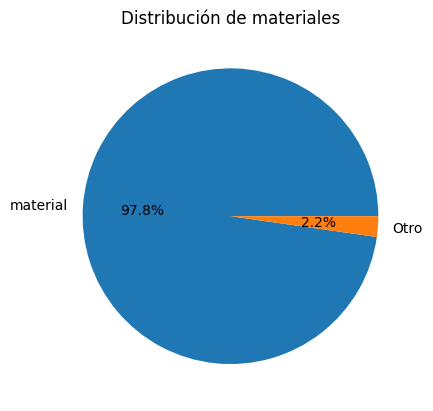

In [5]:
# Crea un diccionario para almacenar la cantidad de elementos por material
materiales = {}
for elemento in datos:
    material = elemento.get('Material Concrete, Cast-in-Place gray', 'Otro')
    if material not in materiales:
        materiales[material] = 0
    materiales[material] += 1

# Crea un gráfico de pastel para mostrar la cantidad de elementos por material
plt.pie(materiales.values(), labels=materiales.keys(), autopct='%1.1f%%')
plt.title('Distribución de materiales')
plt.show()

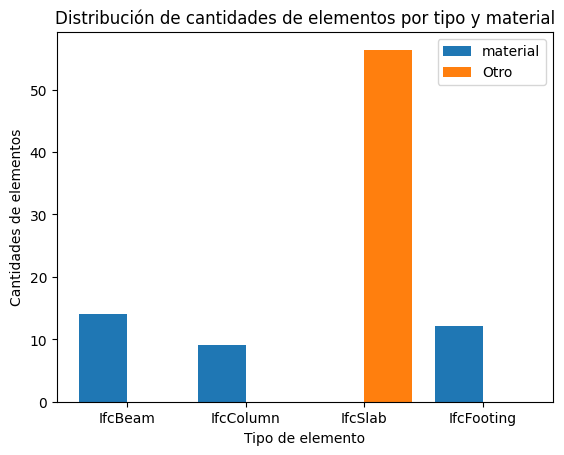

In [6]:
# Crea un diccionario para almacenar las cantidades de elementos por tipo y material
tipos_materiales = {}
for elemento in datos:
    tipo = elemento['Type']
    material = elemento.get('Material Concrete, Cast-in-Place gray', 'Otro')
    if tipo not in tipos_materiales:
        tipos_materiales[tipo] = {}
    if material not in tipos_materiales[tipo]:
        tipos_materiales[tipo][material] = 0
    if 'Property Qto_BeamBaseQuantities.NetVolume' in elemento:
        tipos_materiales[tipo][material] += elemento['Property Qto_BeamBaseQuantities.NetVolume']
    if 'Property Qto_ColumnBaseQuantities.NetVolume' in elemento:
        tipos_materiales[tipo][material] += elemento['Property Qto_ColumnBaseQuantities.NetVolume']
    if 'Property Qto_SlabBaseQuantities.NetVolume' in elemento:
        tipos_materiales[tipo][material] += elemento['Property Qto_SlabBaseQuantities.NetVolume']
    if 'Property Qto_FootingBaseQuantities.NetVolume' in elemento:
        tipos_materiales[tipo][material] += elemento['Property Qto_FootingBaseQuantities.NetVolume']
    if 'Property Qto_WallBaseQuantities.NetVolume' in elemento:
        tipos_materiales[tipo][material] += elemento['Property Qto_WallBaseQuantities.NetVolume']

# Crea un gráfico de barras apiladas para mostrar las cantidades de elementos por tipo y material
tipos = list(tipos_materiales.keys())
materiales = list(set([material for tipo in tipos_materiales.values() for material in tipo.keys()]))
x = np.arange(len(tipos))
ancho = 0.8 / len(materiales)
for i, material in enumerate(materiales):
    cantidades = [tipos_materiales[tipo].get(material, 0) for tipo in tipos]
    plt.bar(x + i * ancho, cantidades, width=ancho, label=material)
plt.xlabel('Tipo de elemento')
plt.ylabel('Cantidades de elementos')
plt.title('Distribución de cantidades de elementos por tipo y material')
plt.xticks(x + ancho * (len(materiales) - 1) / 2, tipos)
plt.legend()
plt.show()